<a href="https://colab.research.google.com/github/ParamAhuja/DL_Notebooks/blob/main/Regression_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ParamAhuja/DL_Notebooks/refs/heads/main/datasets/Admission_Predict_Ver1.1.csv")

In [2]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop(columns = ["Serial No."], inplace = True)

In [13]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train )
X_test = scaler.fit_transform( X_test)

In [19]:
X_train[0]

array([0.62      , 0.67857143, 0.5       , 0.625     , 0.71428571,
       0.65064103, 1.        ])

In [21]:
y_train.iloc[0]

np.float64(0.77)

7 inputs

1 hidden layer

1 output

# model

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential()

In [39]:
model.add(
    Dense(
        8, activation = "relu", input_dim = 7
    )
)
model.add(
    Dense(
        1, activation = "linear", input_dim = 7
    )
)

# linear for regression, always

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss = "mean_squared_error", optimizer = "Adam", metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.6247 - val_accuracy: 0.0000e+00 - val_loss: 0.6213
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.4685 - val_accuracy: 0.0000e+00 - val_loss: 0.5124
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.3936 - val_accuracy: 0.0000e+00 - val_loss: 0.4128
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.3253 - val_accuracy: 0.0000e+00 - val_loss: 0.3251
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.2531 - val_accuracy: 0.0000e+00 - val_loss: 0.2464
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 0.1902 - val_accuracy: 0.0000e+00 - val_loss: 0.1780
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.1353 - val_accuracy: 0.0000e+00 - val_loss: 0.1239
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - ac

accuracy is trying to get exact match, too bad this is regression

In [42]:
y_hat = model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [43]:
y_hat[0], y_test[0]

(array([0.9560627], dtype=float32), np.float64(0.92))

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.4569780249343487

# manually improving model

In [55]:
model2 = Sequential()

In [56]:
model2.add(
    Dense(
        24, activation = "relu", input_dim = 7
    )
)
model2.add(
    Dense(
        1, activation = "linear", input_dim = 7
    )
)

# linear for regression, always

In [57]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 24)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
model2.compile(loss = "mean_squared_error", optimizer = "Adam", metrics = ["accuracy"])
history2 = model2.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0000e+00 - loss: 1.2823 - val_accuracy: 0.0000e+00 - val_loss: 1.0633
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 0.8945 - val_accuracy: 0.0000e+00 - val_loss: 0.6611
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.5495 - val_accuracy: 0.0000e+00 - val_loss: 0.3745
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 0.3160 - val_accuracy: 0.0000e+00 - val_loss: 0.1834
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 0.1635 - val_accuracy: 0.0000e+00 - val_loss: 0.0788
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0850 - val_accuracy: 0.0000e+00 - val_loss: 0.0365
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0481 - val_accuracy: 0.0000e+00 - val_loss: 0.0268
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

accuracy is trying to get exact match, too bad this is regression

In [59]:
y_hat2 = model2.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [60]:
y_hat2[0], y_test[0]

(array([0.90888834], dtype=float32), np.float64(0.92))

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat2)

0.7238087906258108

# vis

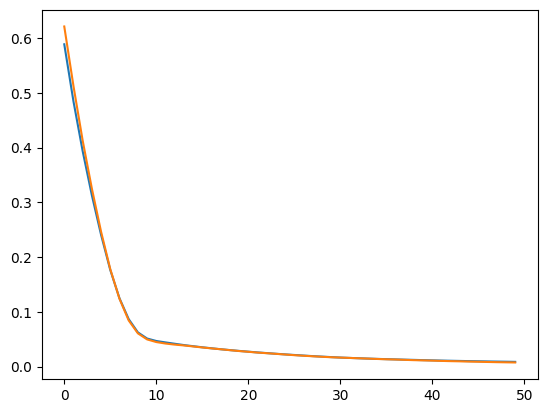

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

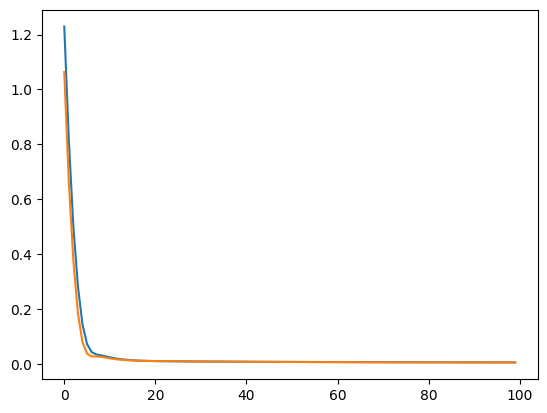

In [67]:
import matplotlib.pyplot as plt

plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])